# Deep Learning Regressor Model:

c:\Users\chesa\OneDrive\Desktop\MLG382\CYO\MLG382_CYO_PROJ_GroupX\src\preprocess_data.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])
c:\Users\chesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.4371 - mae: 0.9854 - val_loss: 0.5141 - val_mae: 0.5856
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9250 - mae: 0.8080 - val_loss: 0.4734 - val_mae: 0.5732
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9355 - mae: 0.8207 - val_loss: 0.3806 - val_mae: 0.5235
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6551 - mae: 0.6561 - val_loss: 0.3020 - val_mae: 0.4710
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5883 - mae: 0.6367 - val_loss: 0.2603 - val_mae: 0.4313
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4390 - mae: 0.5420 - val_loss: 0.2240 - val_mae: 0.3945
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4421 - mae: 0.5397 - val_loss: 0.2053 - val_mae: 0.3674
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3668 - mae: 0.4771 - val_loss: 0.1888 - val_mae: 0.3496
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3972 - mae: 0.5058 - 

Saved model to: ../artifacts\DeepLearningRegressor.h5


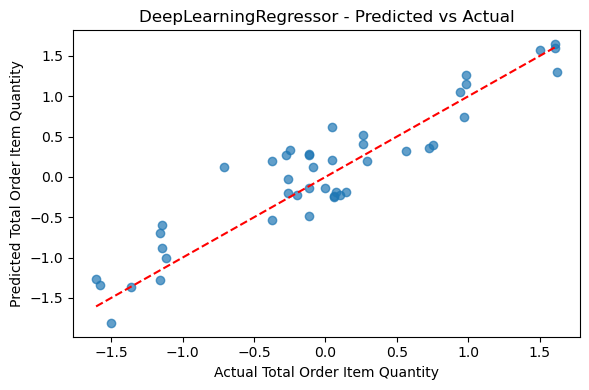

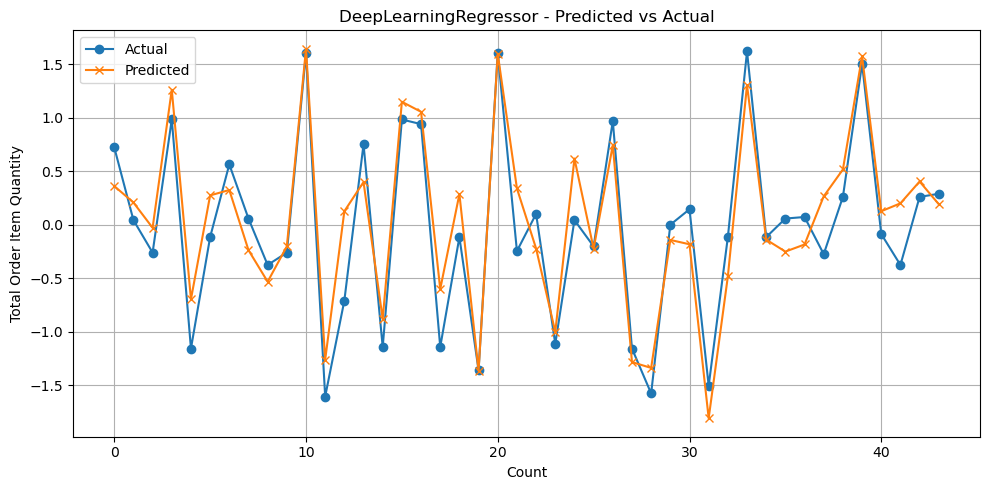

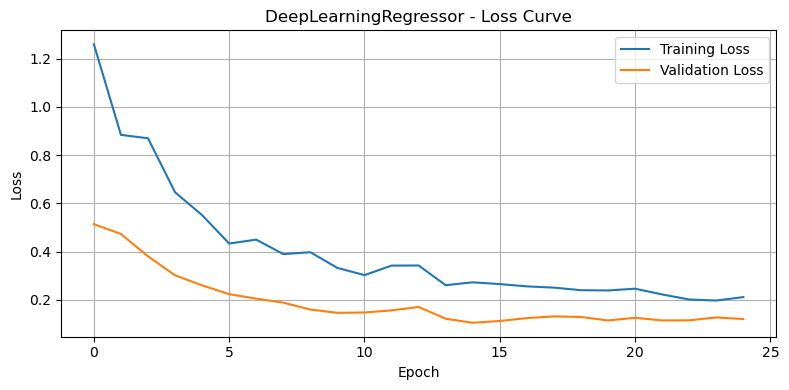

<Sequential name=sequential, built=True>

In [1]:
#Importing Required Libraries
import sys
import os
import numpy as np

#Allows for model to reload without reloading Kernel
import importlib 

#Python files can be used 
sys.path.append(os.path.abspath("../src"))


#preprocess_data.py file importing functions
from preprocess_data import (
    load_data, 
    iterative_outlier_removal, 
    scale_features
)

#prepare_data.py file importing functions
from prepare_data import (
    split_features_target, 
    create_train_test_split
)

#train_models.py file importing training function
from train_models import train_deep_learning_model


#Loads data for use from preprocess_data.py 
df = load_data('../data/ML_Dataset.csv')


#Selects all columns that include number properties from the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

#Calls the iterative outlier removal function from preprocess_data.py to remove outliers
df = iterative_outlier_removal(df, numerical_columns)

#Calls the scale features function from preprocess_data.py to scale features
df, scaler = scale_features(df, numerical_columns)


#Calls the split_features_target function from prepare_data.py to split data into features and target
X, Y = split_features_target(df)

#Calls the create_train_test_split function from prepare_data.py to split data into train and test sets
X_train, X_test, Y_train, Y_test = create_train_test_split(X, Y)


#Imports entire file for reload function
import train_models


#Calls the reload function from train_models.py to automatically reload models
importlib.reload(train_models)


#Calls the train_deep_learning_model function from train_models.py to train the deep learning model
train_deep_learning_model(X_train, X_test, Y_train, Y_test)

